<a href="https://colab.research.google.com/github/rikokir/BarnBridge-Barn/blob/master/Copy_of_USInvestingstocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.deterministic import DeterministicProcess
plt.style.use("seaborn-whitegrid")
plt

plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 5),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
spy = yf.Ticker("SPY")
year = spy.history(start="2022-01-01", end="2023-01-01")

In [ ]:
year['Time'] = np.arange(len(year.index))

Text(0.5, 1.0, 'Time plot of SPY Closing Price over last 12 months')

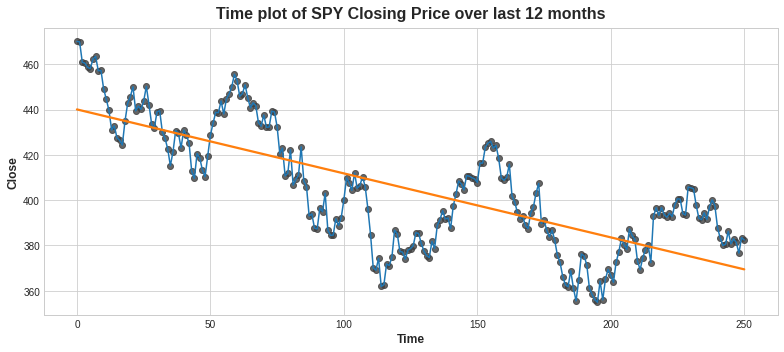

In [ ]:
fig, ax = plt.subplots()
ax.plot('Time', 'Close', data=year)
ax = sns.regplot(x='Time', y='Close', data=year, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time plot of SPY Closing Price over last 12 months')

In [ ]:
print(year.Close.loc[year.index== '2022-01-03'])
print(year.Close.loc[year.index== '2022-12-30'])

Date
2022-01-03 00:00:00-05:00    470.083649
Name: Close, dtype: float64
Date
2022-12-30 00:00:00-05:00    382.429993
Name: Close, dtype: float64


In [ ]:
data = spy.history(period = 'max')


In [ ]:
# prepare X and y
y = data['Close']
dp = DeterministicProcess(index=y.index, order=3)
X = dp.in_sample()

In [ ]:
# fit the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# make predictions
y_pred = pd.Series(model.predict(X), index=X.index)

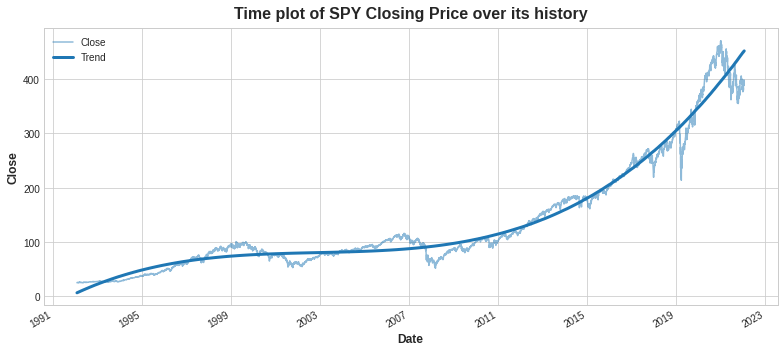

In [ ]:
# plot the predictions against actual values
ax = y.plot(alpha=0.5, title="Time plot of SPY Closing Price over its history", ylabel="Close")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax.legend()

In [ ]:
# model accuracy
model.score(X,y)

0.9709416057327858

In [ ]:
# calculate mean absolute error and mean_absolute_percentage_error
print('Mean Absolute Error =', mean_absolute_error(y, y_pred))
print('Mean Absolute Percentage Error = ', mean_absolute_percentage_error(y, y_pred))

Mean Absolute Error = 12.718664989496075
Mean Absolute Percentage Error =  0.1297066347710634


In [ ]:
data.Close[data.index=='2023-01-19']


Date
2023-01-19 00:00:00-05:00    388.640015
Name: Close, dtype: float64

In [ ]:
y_pred.tail(1)


Date
2023-01-19 00:00:00-05:00    451.86617
dtype: float64

In [ ]:
future = dp.out_of_sample(steps=260)
y_future = pd.Series(model.predict(future), index=future.index)
y_future.tail(1)

7808    513.206105
dtype: float64

In [ ]:
future = dp.out_of_sample(steps=500)
y_future = pd.Series(model.predict(future), index=future.index)
y_future.tail(1)

8048    575.598691
dtype: float64